Pick a data source from this aggregation, load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline

In [81]:
# Load data from CSV file into data frame with Pandas
GDSC_PYR = pd.read_csv('GDSC_PYR.csv')
GDSC_PYR.head()

,Cell line,TCGA classification,Tissue,Tissue sub-type,IC50,AUC
0,LS-411N,COREAD,digestive_system,large_intestine,0.722230,0.420598
1,ES1,UNCLASSIFIED,bone,ewings_sarcoma,1.027104,0.470035
2,ES8,UNCLASSIFIED,bone,ewings_sarcoma,1.069459,0.474589
3,ALL-PO,ALL,blood,lymphoblastic_leukemia,1.134090,0.484931
4,WIL2-NS,UNCLASSIFIED,blood,lymphoid_neoplasm_other,1.196133,0.492336


In [82]:
# Set IC50 values above max screening concentration to max screening concentration
IC50_list = []

for IC50 in GDSC_PYR['IC50']:
    if IC50 > 20:
        IC50_list.append(20)
    else:
        IC50_list.append(IC50)
    
GDSC_PYR['Adjusted IC50'] = IC50_list
GDSC_PYR['Log2 Adjusted IC50'] = np.log2(GDSC_PYR['Adjusted IC50'])
GDSC_PYR['Log2 IC50'] = np.log2(GDSC_PYR['IC50'])
GDSC_PYR.head()

,Cell line,TCGA classification,Tissue,Tissue sub-type,IC50,AUC,Adjusted IC50,Log2 Adjusted IC50,Log2 IC50
0,LS-411N,COREAD,digestive_system,large_intestine,0.722230,0.420598,0.722230,-0.469470,-0.469470
1,ES1,UNCLASSIFIED,bone,ewings_sarcoma,1.027104,0.470035,1.027104,0.038582,0.038582
2,ES8,UNCLASSIFIED,bone,ewings_sarcoma,1.069459,0.474589,1.069459,0.096881,0.096881
3,ALL-PO,ALL,blood,lymphoblastic_leukemia,1.134090,0.484931,1.134090,0.181535,0.181535
4,WIL2-NS,UNCLASSIFIED,blood,lymphoid_neoplasm_other,1.196133,0.492336,1.196133,0.258378,0.258378


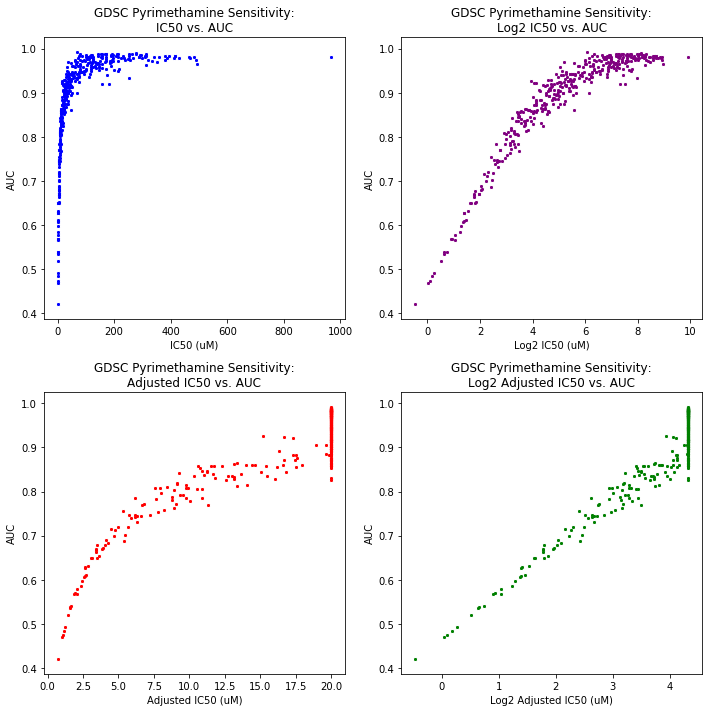

In [83]:
# Define figure dimensions
plt.figure(figsize=(10, 10))

# Define subplots and look at correlation between IC50 and AUC
plt.subplot(2, 2, 1)
plt.scatter(
    x=GDSC_PYR['IC50'],
    y=GDSC_PYR['AUC'],
    color='blue',
    marker='x', s=5
    
)
plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. AUC')
plt.xlabel('IC50 (uM)')
plt.ylabel('AUC')

plt.subplot(2, 2, 3)
plt.scatter(
    x=GDSC_PYR['Adjusted IC50'],
    y=GDSC_PYR['AUC'],
    color='red',
    marker='x', s=5
    
)
plt.title('GDSC Pyrimethamine Sensitivity:\nAdjusted IC50 vs. AUC')
plt.xlabel('Adjusted IC50 (uM)')
plt.ylabel('AUC')

plt.subplot(2, 2, 4)
plt.scatter(
    x=GDSC_PYR['Log2 Adjusted IC50'],
    y=GDSC_PYR['AUC'],
    color='green',
    marker='x', s=5
    
)
plt.title('GDSC Pyrimethamine Sensitivity:\nLog2 Adjusted IC50 vs. AUC')
plt.xlabel('Log2 Adjusted IC50 (uM)')
plt.ylabel('AUC')

plt.subplot(2, 2, 2)
plt.scatter(
    x=GDSC_PYR['Log2 IC50'],
    y=GDSC_PYR['AUC'],
    color='purple',
    marker='x', s=5  
)
plt.title('GDSC Pyrimethamine Sensitivity:\nLog2 IC50 vs. AUC')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')

# Show subplots
plt.tight_layout()
plt.show()

An Interactive Resource to Identify Cancer Genetic and Lineage Dependencies Targeted by Small Molecules (Cell, 2013):

"Area under percent viability curves (AUC) was computed as a measure of sensitivity, as AUC reflects both relative potency and total level of inhibition"

"(A–C) Area under concentration-response curves (AUC) accounts for both EC50 and strength of effect (A). At low percent effect (i.e., when cell viability is relatively unaffected by compound treatment), AUC is essentially independent of relative EC50. In contrast, as percent effect increases, the dependence of AUC on EC50 (as judged by the slope of their correlation) increases such that at 100% effect, changes in AUC are equivalent to changes in log(EC50) (slope = 1)."

The viability of cell lines with predicted IC50 values above the maximum screening concentration of 20 uM is relatively unaffected by pyrimethamine (low percent effect). In contrast, the viability of cell lines with predicted IC50 values below the maximum screening concentration of 20 uM is greatly affected by pyrimethamine (high percent effect).

In [84]:
# Generate new data frame containing data only for cell lines with IC50 < 20
GDSC_clean = GDSC_PYR.loc[lambda df: GDSC_PYR['IC50'] < 20, :]
#GDSC_clean

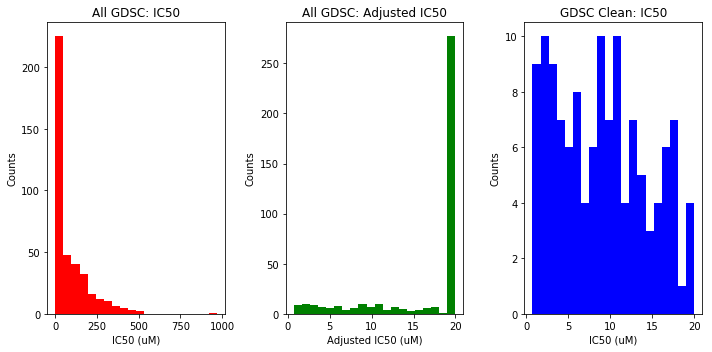

In [85]:
# Define figure dimensions
plt.figure(figsize=(10, 5))

# Define subplots and look at distribution of IC50, Adjusted IC50, and IC50 Clean
plt.subplot(1, 3, 1)
plt.hist(GDSC_PYR['IC50'], bins=20, color='red')
plt.title('All GDSC: IC50')
plt.xlabel('IC50 (uM)')
plt.ylabel('Counts')

plt.subplot(1, 3, 2)
plt.hist(GDSC_PYR['Adjusted IC50'], bins=20, color='green')
plt.title('All GDSC: Adjusted IC50')
plt.xlabel('Adjusted IC50 (uM)')
plt.ylabel('Counts')

plt.subplot(1, 3, 3)
plt.hist(GDSC_clean['IC50'], bins=20, color='blue')
plt.title('GDSC Clean: IC50')
plt.xlabel('IC50 (uM)')
plt.ylabel('Counts')

# Show plots
plt.tight_layout()
plt.show()

Over 200 cell lines have predicted IC50 values above the maximum screening concentration of 20 uM. Resetting these predicted IC50 values to 20 uM and/or removing these cell lines from the data set allows easier visualization of the cell lines with IC50 values within the tested concentration range.

In [86]:
# Generate data frames containing PYR sensitive, intermediate_1, intermediate_2, and resistant cell lines
# Use 0-5 uM as sensitive, 5-10 as intermediate_1, 10-15 as intermediate_2, 15-20 uM as resistant
PYR_sen = GDSC_clean.loc[lambda df: GDSC_clean['IC50'] < 5, :]
PYR_temp1 = GDSC_clean.loc[lambda df: GDSC_clean['IC50'] < 10, :]
PYR_int1 = PYR_temp1.loc[lambda df: PYR_temp1['IC50'] >= 5, :]
PYR_temp2 = GDSC_clean.loc[lambda df: GDSC_clean['IC50'] < 15, :]
PYR_int2 = PYR_temp2.loc[lambda df: PYR_temp2['IC50'] >= 10, :]
PYR_res = GDSC_clean.loc[lambda df: GDSC_clean['IC50'] >= 15, :]

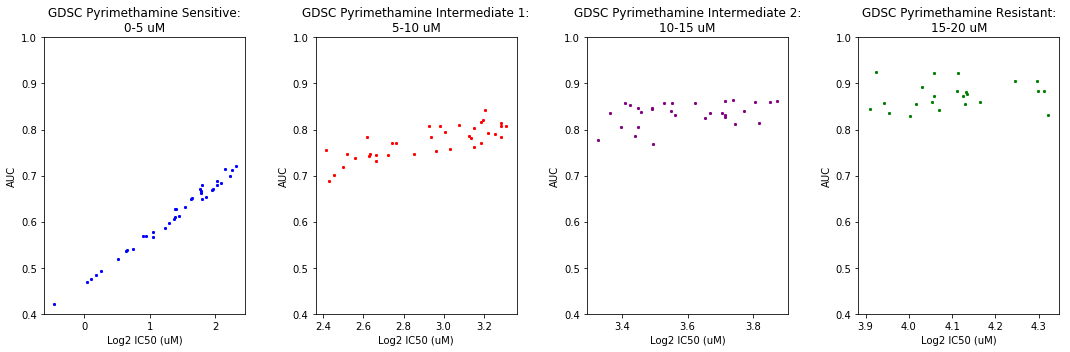

In [87]:
# Plot Log2 IC50 vs. AUC and compare between sensitive and resistant cell lines
# Define figure dimensions
plt.figure(figsize=(15, 5))

# Define subplots and look at correlation between IC50 and AUC
plt.subplot(1, 4, 1)
plt.scatter(
    x=PYR_sen['Log2 IC50'],
    y=PYR_sen['AUC'],
    color='blue',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Sensitive:\n0-5 uM')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)


plt.subplot(1, 4, 2)
plt.scatter(
    x=PYR_int1['Log2 IC50'],
    y=PYR_int1['AUC'],
    color='red',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Intermediate 1:\n5-10 uM')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

plt.subplot(1, 4, 3)
plt.scatter(
    x=PYR_int2['Log2 IC50'],
    y=PYR_int2['AUC'],
    color='purple',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Intermediate 2:\n10-15 uM')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

plt.subplot(1, 4, 4)
plt.scatter(
    x=PYR_res['Log2 IC50'],
    y=PYR_res['AUC'],
    color='green',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Resistant:\n15-20 uM')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

# Show plots
plt.tight_layout()
plt.show()

The viability of cell lines with IC50 values below 5 uM is greatly decreased by pyrimethamine (100% effect). However, the percent effect decreases as the IC50 value increases (slope moves towards 0). In other words, AUC can be used to predict IC50 values when the cell lines are sensitive to pyrimethamine, but this predictive relationship falls apart for intermediate to resistant cell lines.

In [88]:
# Generate separate data frames based on tissue from GDSC_clean
tissue_list = []

for row in GDSC_clean['Tissue']:
    if row not in tissue_list:
        tissue_list.append(row)
    
print(tissue_list)

# New way
tissue_dict = {}

for tissue in tissue_list:
    tissue_dict[tissue] = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == tissue, 'IC50']

# Old way (before I figured out the dictionary)
PYR_digestive_system = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'digestive_system', :]
PYR_blood = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'blood', :]
PYR_bone = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'bone', :]
PYR_nervous_system = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'nervous_system', :]
PYR_urogenital_system = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'urogenital_system', :]
PYR_kidney = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'kidney', :]
PYR_skin = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'skin', :]
PYR_lung = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'lung', :]
PYR_breast = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'breast', :]
PYR_pancreas = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'pancreas', :]
PYR_aero_digestive_tract = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'aero_digestive_tract', :]
PYR_soft_tissue = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'soft_tissue', :]
PYR_thyroid = GDSC_clean.loc[lambda df: GDSC_clean['Tissue'] == 'thyroid', :]

['digestive_system', 'bone', 'blood', 'nervous_system', 'urogenital_system', 'kidney', 'skin', 'lung', 'breast', 'pancreas', 'aero_digestive_tract', 'soft_tissue', 'thyroid']


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


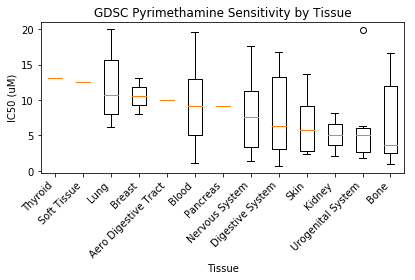

In [89]:
# Generate box plots
# Old way
my_dict = {
    'Thyroid': PYR_thyroid['IC50'],
    'Soft Tissue': PYR_soft_tissue['IC50'],
    'Lung': PYR_lung['IC50'],
    'Breast': PYR_breast['IC50'],
    'Aero Digestive Tract': PYR_aero_digestive_tract['IC50'],
    'Blood': PYR_blood['IC50'],
    'Pancreas': PYR_pancreas['IC50'],
    'Nervous System': PYR_nervous_system['IC50'],
    'Digestive System': PYR_digestive_system['IC50'],
    'Skin': PYR_skin['IC50'],
    'Kidney': PYR_kidney['IC50'],
    'Urogenital System': PYR_urogenital_system['IC50'],
    'Bone': PYR_bone['IC50']  
}
              
fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), labels=my_dict.keys())
plt.xticks(rotation = 45, ha='right')
plt.ylabel('IC50 (uM)')
plt.xlabel('Tissue')
plt.title('GDSC Pyrimethamine Sensitivity by Tissue')

# Show plots
plt.tight_layout()
plt.show()

Cancer cell lines derived from bone are the most sensitive to pyrimethamine based on median IC50, but cell lines within this tissue group have differential responses (some sensitive, some resistant). Cancer cell lines derived from kidney and urogenital tissue tend to be almost universally sensitive to pyrimethamine (all but one IC50 value below 10).

Although unclear from this plot, I would guess that the magnitude of the IQR and overall range largely depends on the number of cell lines within each tissue group.

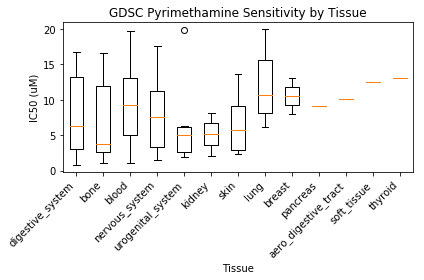

In [90]:
# Generate box plots
# New way
fig, ax = plt.subplots()
ax.boxplot(tissue_dict.values(), labels=tissue_dict.keys())
plt.xticks(rotation = 45, ha='right')
plt.ylabel('IC50 (uM)')
plt.xlabel('Tissue')
plt.title('GDSC Pyrimethamine Sensitivity by Tissue')

# Show plots
plt.tight_layout()
plt.show()

See above.

In [91]:
count_spread_list = []

for tissue in tissue_dict:
    count = len(tissue_dict[tissue])
    spread = max(tissue_dict[tissue]) - min(tissue_dict[tissue])
    count_spread_list.append({
        'tissue' : tissue, 
        'count' : count,
        'spread' : spread})

count_spread_pd = pd.DataFrame(count_spread_list)
    
count_spread_pd

,count,spread,tissue
0,11,16.069079,digestive_system
1,10,15.630178,bone
2,66,18.524212,blood
3,6,16.125856,nervous_system
4,6,17.999663,urogenital_system
5,2,6.126816,kidney
6,6,11.303140,skin
7,14,13.786515,lung
8,2,5.089370,breast
9,1,0.000000,pancreas


(0, 15)

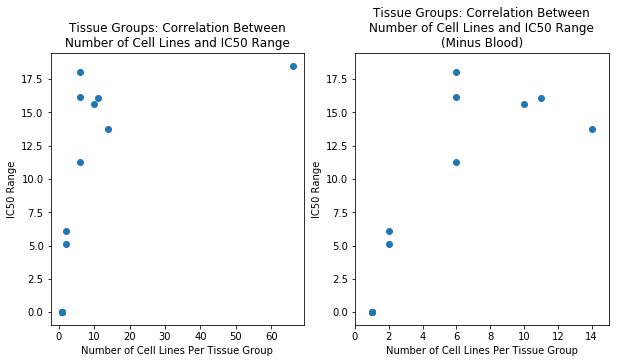

In [92]:
# Generate scatter plot of correlation between count and spread
# Define figure size
plt.figure(figsize=(10, 5))

# Define subplots
plt.subplot(1, 2, 1)
plt.scatter(
    x=count_spread_pd['count'],
    y=count_spread_pd['spread']
)

plt.xlabel('Number of Cell Lines Per Tissue Group')
plt.ylabel('IC50 Range')
plt.title('Tissue Groups: Correlation Between\nNumber of Cell Lines and IC50 Range')

plt.subplot(1, 2, 2)
plt.scatter(
    x=count_spread_pd['count'],
    y=count_spread_pd['spread']
)

plt.xlabel('Number of Cell Lines Per Tissue Group')
plt.ylabel('IC50 Range')
plt.title('Tissue Groups: Correlation Between\nNumber of Cell Lines and IC50 Range\n(Minus Blood)')
plt.xlim(0, 15)

This scatter plot seems to support my hypothesis that the IC50 range would increase with the number of data points or cell lines per tissue group. However, there seems to be a limit to the relationship (range doesn't appear to increase beyond the threshold set at about 6 cell lines).

r^2 is 0.2963897075441614


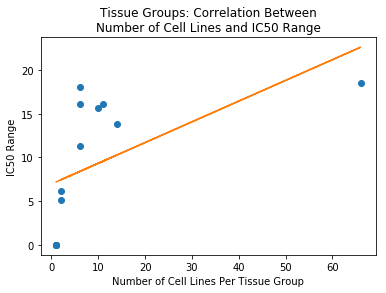

In [93]:
slope, intercept, r_value, p_value, std_err = stats.linregress(count_spread_pd['count'], count_spread_pd['spread'])
line = slope * count_spread_pd['count'] + intercept

plt.plot(count_spread_pd['count'], count_spread_pd['spread'], 'o', count_spread_pd['count'], line)

plt.xlabel('Number of Cell Lines Per Tissue Group')
plt.ylabel('IC50 Range')
plt.title('Tissue Groups: Correlation Between\nNumber of Cell Lines and IC50 Range')

print('r^2 is ' + str(r_value ** 2))

r^2 is 0.6710647319153678


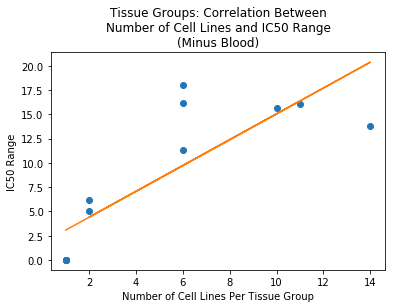

In [94]:
# Linear regression for data set without blood
minus_blood_pd = count_spread_pd.loc[lambda df: count_spread_pd['count'] < 66, :]

slope, intercept, r_value, p_value, std_err = stats.linregress(minus_blood_pd['count'], minus_blood_pd['spread'])
line = slope * minus_blood_pd['count'] + intercept

plt.plot(minus_blood_pd['count'], minus_blood_pd['spread'], 'o', minus_blood_pd['count'], line)

plt.xlabel('Number of Cell Lines Per Tissue Group')
plt.ylabel('IC50 Range')
plt.title('Tissue Groups: Correlation Between\nNumber of Cell Lines and IC50 Range\n(Minus Blood)')

print('r^2 is ' + str(r_value ** 2))

In [95]:
# Open CCLE RNA seq file for DHFR and store as data frame
DHFR_exp = pd.read_csv('RNAseq_CCLE_DHFR_Flip.txt', sep = "\t")
DHFR_exp.head()

# Create Cell Line and Tissue columns by splitting text in original Cell Line column
cell_line_list = []
tissue_list = []

for cell_line in DHFR_exp['Cell Line']:
    cell_line_list.append(cell_line.split('_', 1)[0])
    if len(cell_line.split('_', 1)) == 2:
        tissue_list.append(cell_line.split('_', 1)[1])
    elif len(cell_line.split('_', 1)) == 1:
        tissue_list.append(None)

DHFR_exp['Cell Line'] = cell_line_list
DHFR_exp['Tissue'] = tissue_list
DHFR_exp

# Remove row entries that contain NaN
DHFR_exp = DHFR_exp.dropna()
DHFR_exp.head()

,Cell Line,DHFR Expression,Tissue
0,DMS53,5.307420,LUNG
1,SW1116,4.830703,LARGE_INTESTINE
2,NCIH1694,5.635937,LUNG
3,P3HR1,5.635804,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
4,HUT78,5.495157,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE


In [96]:
# Make cell lines uppercase and remove dashes
new_cell_line_list = []

for cell_line in GDSC_PYR['Cell line']:
    new_cell_line_list.append(cell_line.upper().replace('-', ''))
    
GDSC_PYR['Updated Cell Line'] = new_cell_line_list

GDSC_PYR.head()

,Cell line,TCGA classification,Tissue,Tissue sub-type,IC50,AUC,Adjusted IC50,Log2 Adjusted IC50,Log2 IC50,Updated Cell Line
0,LS-411N,COREAD,digestive_system,large_intestine,0.722230,0.420598,0.722230,-0.469470,-0.469470,LS411N
1,ES1,UNCLASSIFIED,bone,ewings_sarcoma,1.027104,0.470035,1.027104,0.038582,0.038582,ES1
2,ES8,UNCLASSIFIED,bone,ewings_sarcoma,1.069459,0.474589,1.069459,0.096881,0.096881,ES8
3,ALL-PO,ALL,blood,lymphoblastic_leukemia,1.134090,0.484931,1.134090,0.181535,0.181535,ALLPO
4,WIL2-NS,UNCLASSIFIED,blood,lymphoid_neoplasm_other,1.196133,0.492336,1.196133,0.258378,0.258378,WIL2NS


In [349]:
# Create new abbreviated data frame
updated_GDSC_PYR = pd.DataFrame()
updated_GDSC_PYR['Cell Line'] = GDSC_PYR['Updated Cell Line']
updated_GDSC_PYR['IC50'] = GDSC_PYR['IC50']
updated_GDSC_PYR['AUC'] = GDSC_PYR['AUC']
updated_GDSC_PYR['Log2 IC50'] = GDSC_PYR['Log2 IC50']

merged_inner = pd.merge(left=updated_GDSC_PYR, right=DHFR_exp, left_on='Cell Line', right_on='Cell Line')
merged_inner.head()

,Cell Line,IC50,AUC,Log2 IC50,DHFR Expression,Tissue
0,LS411N,0.722230,0.420598,-0.469470,4.544675,LARGE_INTESTINE
1,697,1.565345,0.538762,0.646481,5.976265,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,ES2,1.912182,0.569532,0.935220,3.638062,OVARY
3,LAMA84,2.059533,0.578236,1.042317,4.507355,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
4,OSRC2,2.059810,0.567375,1.042511,4.182983,KIDNEY


In [353]:
sensitive = merged_inner.loc[lambda df: merged_inner['IC50'] < 5, :]
int_1 = merged_inner.loc[lambda df: merged_inner['IC50'] < 10, :]
intermediate_1 = int_1.loc[lambda df: int_1['IC50'] >= 5, :]
int_2 = merged_inner.loc[lambda df: merged_inner['IC50'] < 15, :]
intermediate_2 = int_2.loc[lambda df: int_2['IC50'] >= 10, :]
int_3 = merged_inner.loc[lambda df: merged_inner['IC50'] < 20, :]
resistant = int_3.loc[lambda df: int_3['IC50'] >= 15, :]

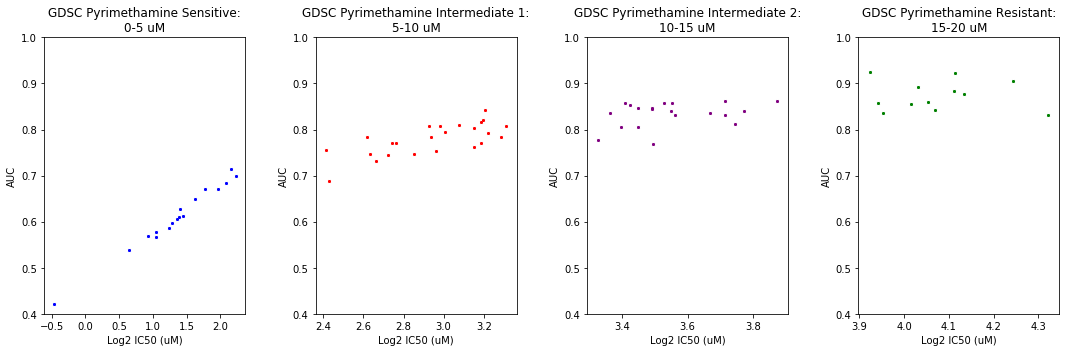

In [354]:
# Plot Log2 IC50 vs. AUC and compare between sensitive and resistant cell lines
# Define figure dimensions
plt.figure(figsize=(15, 5))

# Define subplots and look at correlation between IC50 and AUC
plt.subplot(1, 4, 1)
plt.scatter(
    x=sensitive['Log2 IC50'],
    y=sensitive['AUC'],
    color='blue',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Sensitive:\n0-5 uM')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)


plt.subplot(1, 4, 2)
plt.scatter(
    x=intermediate_1['Log2 IC50'],
    y=intermediate_1['AUC'],
    color='red',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Intermediate 1:\n5-10 uM')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

plt.subplot(1, 4, 3)
plt.scatter(
    x=intermediate_2['Log2 IC50'],
    y=intermediate_2['AUC'],
    color='purple',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Intermediate 2:\n10-15 uM')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

plt.subplot(1, 4, 4)
plt.scatter(
    x=resistant['Log2 IC50'],
    y=resistant['AUC'],
    color='green',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Resistant:\n15-20 uM')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

# Show plots
plt.tight_layout()
plt.show()

In [356]:
sensitive

,Cell Line,IC50,AUC,Log2 IC50,DHFR Expression,Tissue
0,LS411N,0.722230,0.420598,-0.469470,4.544675,LARGE_INTESTINE
1,697,1.565345,0.538762,0.646481,5.976265,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2,ES2,1.912182,0.569532,0.935220,3.638062,OVARY
3,LAMA84,2.059533,0.578236,1.042317,4.507355,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
4,OSRC2,2.059810,0.567375,1.042511,4.182983,KIDNEY
5,COLO829,2.358134,0.585737,1.237646,2.146578,SKIN
6,SJSA1,2.437705,0.597080,1.285524,5.206923,BONE
7,UACC257,2.575552,0.606783,1.364882,4.730695,SKIN
8,KM12,2.605882,0.609712,1.381772,5.198416,LARGE_INTESTINE
9,CMK,2.644045,0.628464,1.402747,4.871751,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE


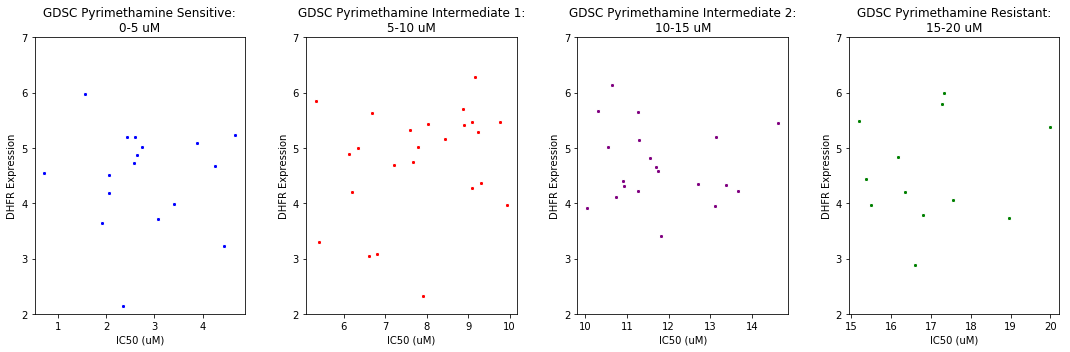

In [366]:
# Plot IC50 vs. DHFR expression and compare between sensitive and resistant cell lines
# Define figure dimensions
plt.figure(figsize=(15, 5))

# Define subplots and look at correlation between IC50 and AUC
plt.subplot(1, 4, 1)
plt.scatter(
    x=sensitive['IC50'],
    y=sensitive['DHFR Expression'],
    color='blue',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Sensitive:\n0-5 uM')
plt.xlabel('IC50 (uM)')
plt.ylabel('DHFR Expression')
plt.ylim(2, 7)


plt.subplot(1, 4, 2)
plt.scatter(
    x=intermediate_1['IC50'],
    y=intermediate_1['DHFR Expression'],
    color='red',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Intermediate 1:\n5-10 uM')
plt.xlabel('IC50 (uM)')
plt.ylabel('DHFR Expression')
plt.ylim(2, 7)

plt.subplot(1, 4, 3)
plt.scatter(
    x=intermediate_2['IC50'],
    y=intermediate_2['DHFR Expression'],
    color='purple',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Intermediate 2:\n10-15 uM')
plt.xlabel('IC50 (uM)')
plt.ylabel('DHFR Expression')
plt.ylim(2, 7)

plt.subplot(1, 4, 4)
plt.scatter(
    x=resistant['IC50'],
    y=resistant['DHFR Expression'],
    color='green',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Resistant:\n15-20 uM')
plt.xlabel('IC50 (uM)')
plt.ylabel('DHFR Expression')
plt.ylim(2, 7)

# Show plots
plt.tight_layout()
plt.show()

In [364]:
print(
    sensitive['DHFR Expression'].mean(),
    intermediate_1['DHFR Expression'].mean(),
    intermediate_2['DHFR Expression'].mean(),
    resistant['DHFR Expression'].mean()
)

4.46766936817647 4.747736887708332 4.677904143499999 4.5476420522500005


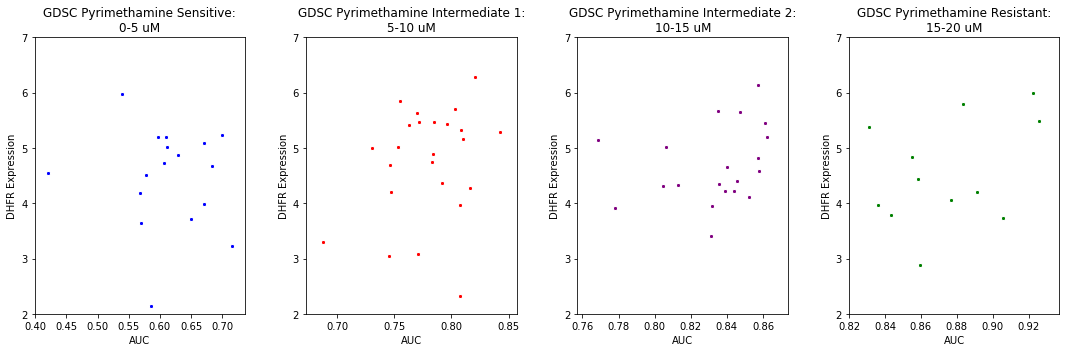

In [369]:
# Plot IC50 vs. DHFR expression and compare between sensitive and resistant cell lines
# Define figure dimensions
plt.figure(figsize=(15, 5))

# Define subplots and look at correlation between IC50 and AUC
plt.subplot(1, 4, 1)
plt.scatter(
    x=sensitive['AUC'],
    y=sensitive['DHFR Expression'],
    color='blue',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Sensitive:\n0-5 uM')
plt.xlabel('AUC')
plt.ylabel('DHFR Expression')
plt.ylim(2, 7)


plt.subplot(1, 4, 2)
plt.scatter(
    x=intermediate_1['AUC'],
    y=intermediate_1['DHFR Expression'],
    color='red',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Intermediate 1:\n5-10 uM')
plt.xlabel('AUC')
plt.ylabel('DHFR Expression')
plt.ylim(2, 7)

plt.subplot(1, 4, 3)
plt.scatter(
    x=intermediate_2['AUC'],
    y=intermediate_2['DHFR Expression'],
    color='purple',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Intermediate 2:\n10-15 uM')
plt.xlabel('AUC')
plt.ylabel('DHFR Expression')
plt.ylim(2, 7)

plt.subplot(1, 4, 4)
plt.scatter(
    x=resistant['AUC'],
    y=resistant['DHFR Expression'],
    color='green',
    marker='x', s=5
)

plt.title('GDSC Pyrimethamine Resistant:\n15-20 uM')
plt.xlabel('AUC')
plt.ylabel('DHFR Expression')
plt.ylim(2, 7)

# Show plots
plt.tight_layout()
plt.show()